In [118]:
using Flux
using Statistics
using Plots
include("./AfqsJuliaUtil.jl")
using .AfqsJuliaUtil

# Fitting a Linear Model

In [391]:
d = Dense(2,2)

Dense(2, 2)

In [386]:
dat_x = Azip(1f0:0.1f0:10f0, 1f0:0.1f0:10f0);
dat_y = 3.2f0.*dat_x .- 0.2f0;

In [387]:
dat_x

2×91 Array{Float32,2}:
 1.0  1.1  1.2  1.3  1.4  1.5  1.6  …  9.4  9.5  9.6  9.7  9.8  9.9  10.0
 1.0  1.1  1.2  1.3  1.4  1.5  1.6     9.4  9.5  9.6  9.7  9.8  9.9  10.0

In [388]:
dat_y

2×91 Array{Float32,2}:
 3.0  3.32  3.64  3.96  4.28  4.6  4.92  …  30.52  30.84  31.16  31.48  31.8
 3.0  3.32  3.64  3.96  4.28  4.6  4.92     30.52  30.84  31.16  31.48  31.8

In [392]:
d(dat_x)

Tracked 2×91 Array{Float32,2}:
 -0.774453  -0.851898  -0.929344  -1.00679   …  -7.58964  -7.66709  -7.74453
  0.546411   0.601052   0.655693   0.710334      5.35482   5.40947   5.46411

In [402]:
pars=params(d)
loss(x,y) = Flux.mse( y, d(x) )
grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y)/length(dat_x), pars)

Grads(...)


In [403]:
for l in pars println(l) end

Float32[-8.06381 -8.48092; -5.62046 -4.32294] (tracked)
Float32[-1.16827, -0.776819] (tracked)


In [406]:
for epoch = 1:100
    r = 1.0
    l = loss(dat_x,dat_y)
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y)/length(dat_x), pars)
    for p in pars
        Flux.Tracker.update!(p, -r*grads[p])
    end
    println(l, pars...)
end

1.0317796f0 (tracked)Float32[1.71653 1.29942; 0.885099 2.18262] (tracked)Float32[0.277296, 0.183907] (tracked)
0.37939823f0 (tracked)Float32[1.73968 1.32256; 0.900499 2.19802] (tracked)Float32[0.280235, 0.185796] (tracked)
0.15435159f0 (tracked)Float32[1.75328 1.33617; 0.909555 2.20707] (tracked)Float32[0.28176, 0.186743] (tracked)
0.07668793f0 (tracked)Float32[1.76129 1.34418; 0.914885 2.2124] (tracked)Float32[0.282453, 0.187137] (tracked)
0.049855087f0 (tracked)Float32[1.76601 1.34889; 0.918028 2.21555] (tracked)Float32[0.282659, 0.187207] (tracked)
0.040553395f0 (tracked)Float32[1.76879 1.35168; 0.919885 2.2174] (tracked)Float32[0.282579, 0.187087] (tracked)
0.037298243f0 (tracked)Float32[1.77044 1.35333; 0.920988 2.21851] (tracked)Float32[0.282331, 0.186855] (tracked)
0.036128614f0 (tracked)Float32[1.77143 1.35431; 0.921648 2.21917] (tracked)Float32[0.281984, 0.186558] (tracked)
0.0356783f0 (tracked)Float32[1.77202 1.3549; 0.922047 2.21957] (tracked)Float32[0.28158, 0.186223] (trac

In [401]:
d(dat_x)

Tracked 2×91 Array{Float32,2}:
 -17.713   -19.3675  -21.022   -22.6764  …  -163.307   -164.961   -166.616
 -10.7202  -11.7146  -12.7089  -13.7032      -98.2221   -99.2165  -100.211

In [397]:
pars

Params([Float32[-1.15115 -1.56826; -1.02241 0.275105] (tracked), Float32[-0.143831, -0.0956032] (tracked)])

# Fitting a Linear Model Under the Hood

The two-point check

In [360]:
dat_x = [1.0,2.0]
dat_y = 3*dat_x .+ 1

2-element Array{Float64,1}:
 4.0
 7.0

A standard linear regression dataset

In [428]:
dat_x = collect(1:0.1:10);
dat_y = 3.2*dat_x .- 0.2 .+ rand(length(dat_x));

In [429]:
W = param([2]);
b = param([2]);
f(x) = W.*x.+b;

In [430]:
pars=Flux.Tracker.Params([W,b])
loss(x,y) = Flux.mse(y,f(x))
grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)

Grads(...)


Verify that my definition of the loss made sense:

In [431]:
sum((dat_y - f(dat_x)).^2)/length(dat_y)

34.14229018515163 (tracked)

In [432]:
Flux.mse(dat_y,f(dat_x))

34.14229018515164 (tracked)

In [433]:
loss(dat_x,dat_y)

34.14229018515164 (tracked)

In [434]:
grads[W], grads[b]

([-70.6198] (tracked), [-9.8452] (tracked))

0.14236591346894747 (tracked)
0.1380318360567977 (tracked)
0.13400168736059784 (tracked)
0.13025415427132975 (tracked)
0.12676941826930507 (tracked)
0.12352905061555967 (tracked)
0.12051591489298555 (tracked)
0.1177140763818036 (tracked)
0.11510871779011157 (tracked)
0.11268606089385841 (tracked)
0.11268606089385841 (tracked)


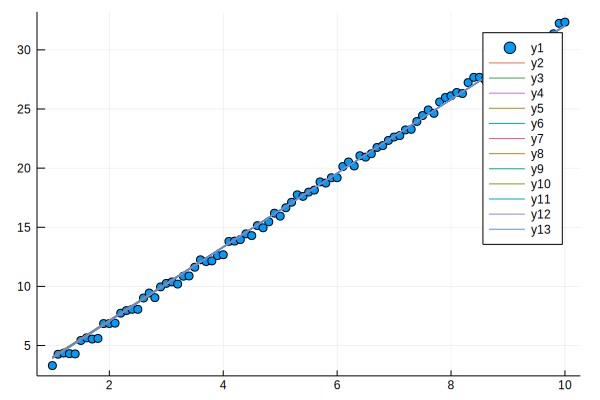

In [438]:
scatter(dat_x,dat_y)
plot!(dat_x,map(y->y.data,f(dat_x)))
for epoch = 1:1000
    r = 0.001
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y), pars)
    #println(W
    for p in (W,b)
        Flux.Tracker.update!(p, -r*grads[p])
    end
    if epoch % 100 == 0
        println(loss(dat_x,dat_y))
        plot!(dat_x,map(y->y.data,f(dat_x)))
    end
#     Flux.Tracker.update!(pars,grads)
#     println(l)
end
println(loss(dat_x,dat_y))
plot!(dat_x,map(y->y.data,f(dat_x)))

## Minimal reproducing example

In [411]:
loss(dat_x,dat_y)

0.07827195169478471 (tracked)

In [412]:
loss(dat_x[1],dat_y[1])

0.010293028778491253 (tracked)

In [414]:
loss(dat_x[2:10],dat_y[2:10])

0.16113086609376281 (tracked)

In [415]:
loss(dat_x[2:12],dat_y[2:12])

0.1395977320688886 (tracked)

In [424]:
grads_by_size(N) = Flux.Tracker.gradient(() -> loss(dat_x[1:N], dat_y[1:N]), pars)

grads_by_size (generic function with 1 method)

In [426]:
dat_x = collect(1:0.1:10);
dat_y = 3.2*dat_x .- 0.2 .+ rand(length(dat_x));
W = param([2]);
b = param([2]);
f(x) = W.*x.+b;
pars=Flux.Tracker.Params([W,b])
loss(x,y) = Flux.mse(y,f(x))
PROBLEM_DENOM = 1
# PROBLEM_DENOM = length(dat_x)

monitor_freq = 100
for epoch = 1:1000
    r = 0.0001
    grads = Flux.Tracker.gradient(() -> loss(dat_x, dat_y)/PROBLEM_DENOM, pars)
    for p in (W,b)
        Flux.Tracker.update!(p, -r*grads[p])
    end
    if epoch % monitor_freq == 0
        println(loss(dat_x,dat_y))
    end
end

8.024415825241947 (tracked)
2.321684073143397 (tracked)
1.0763967584977092 (tracked)
0.8016291892830995 (tracked)
0.7381935380558071 (tracked)
0.7207961068285383 (tracked)
0.7134482799799927 (tracked)
0.7083142794616957 (tracked)
0.7036878805764034 (tracked)
0.6991974116330913 (tracked)


# Hessian

In [455]:
gw=grads[W]

Tracked 1-element Array{Float64,1}:
 -0.022495840108123687

In [466]:
gw

Tracked 1-element Array{Float64,1}:
 -0.022495840108123687

In [470]:
pars

Params([[3.13169] (tracked), [0.773854] (tracked)])

In [472]:
Flux.Tracker.gradient_nested( (()->grads[W][1]) , pars )

ErrorException: Use `gradient(...; nest = true)` for nested derivatives

# Type sanitation of Tracker

In [106]:
Float64(f(dat_x)[1])

MethodError: MethodError: no method matching Float64(::Tracker.TrackedReal{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:194
  Float64(::T<:Number) where T<:Number at boot.jl:741
  Float64(!Matched::Int8) at float.jl:60
  ...

In [10]:
Float64(W)

MethodError: MethodError: no method matching Float64(::Tracker.TrackedReal{Float64})
Closest candidates are:
  Float64(::Real, !Matched::RoundingMode) where T<:AbstractFloat at rounding.jl:194
  Float64(::T<:Number) where T<:Number at boot.jl:741
  Float64(!Matched::Int8) at float.jl:60
  ...

In [11]:
Base.convert(::Type{T},x::Tracker.TrackedReal{T}) where {T} = T(x.data)

In [7]:
#Real(x::Tracker.TrackedReal{T}) where T<:Real = Real(x.data)